In [29]:
import pandas as pd

boston_housing_data = pd.read_csv("data/boston.csv")
boston_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  MEDV     506 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 47.6 KB


In [30]:
boston_housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,36.2


<Axes: ylabel='Frequency'>

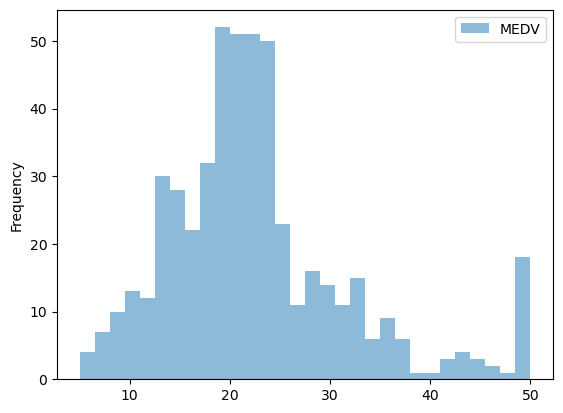

In [37]:
boston_housing_data.plot.hist(column="MEDV", bins=30, alpha=0.5)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    boston_housing_data.drop(columns=["MEDV"]),
    boston_housing_data["MEDV"],
    test_size=0.2,
    random_state=42,
)

pipeline = Pipeline([("scaler", StandardScaler()), ("regressor", LinearRegression())])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 29.029078461798537


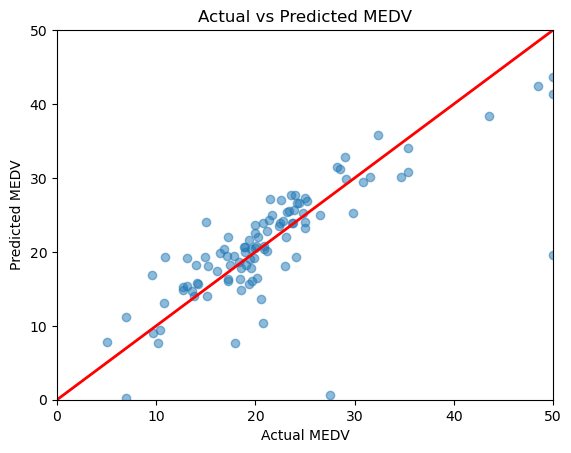

In [46]:
import matplotlib.pyplot as plt

max_value = max(y_test.max(), y_pred.max())

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted MEDV")
plt.xlim(0, max_value)
plt.ylim(0, max_value)
plt.plot([0, max_value], [0, max_value], color="red", linewidth=2)
plt.show()